In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [2]:
ds1 = pd.read_csv("C:/Users/annaw/Desktop/DataScience/Datasets/dataset1.csv")
print(ds1.head())

   Unnamed: 0       datum station_code  aspect  elevation  avalancheDay1  \
0           0  2020-01-13         ALB2       2     2322.0              0   
1           1  2020-01-23         ALB2       2     2322.0              0   
2           2  2020-01-10         ALB2       2     2322.0              0   
3           3  2020-01-07         ALB2       2     2322.0              0   
4           4  2020-02-12         ALB2       2     2322.0              0   

   max_height  TSS_mod  prop_base_3_diff  ILWR_daily  ...  prop_base  \
0      103.39   -9.163               0.0  195.538500  ...        0.0   
1      100.71  -10.366               0.0  178.027875  ...        0.0   
2      104.78  -13.180               0.0  206.648875  ...        0.0   
3      106.02  -10.190               0.0  203.045875  ...        0.0   
4      120.11  -10.941               0.0  195.496250  ...        0.0   

   ISWR_diff   SWE_daily   zSs_daily  HS_mod_daily  water_1_diff  \
0     88.098  323.626125   85.419125    10

In [3]:
ds2 = pd.read_csv("C:/Users/annaw/Desktop/DataScience/Datasets/dataset2.csv")
forecast = pd.read_csv("C:/Users/annaw/Desktop/DataScience/Datasets/dataset3_forecast.csv")
nowcast = pd.read_csv("C:/Users/annaw/Desktop/DataScience/Datasets/dataset3_nowcast.csv")

In [4]:
print(ds1.columns)
#i need datum, avalancheDay1
#20-01-13, (0 or 1)
ds1_plot = ds1[['datum', 'avalancheDay1']]
ds2_plot = ds2[['datum', 'avalancheDay1']]
forecast_plot = forecast[['datum', 'avalancheDay1']]
nowcast_plot = nowcast[['datum', 'avalancheDay1']]

Index(['Unnamed: 0', 'datum', 'station_code', 'aspect', 'elevation',
       'avalancheDay1', 'max_height', 'TSS_mod', 'prop_base_3_diff',
       'ILWR_daily', 'RH_daily', 'ISWR_diff_daily', 'prop_base_1_diff',
       'prop_wet_2_diff', 'prop_wet_3_diff', 'max_height_3_diff',
       'lowest_2_diff', 'mean_lwc_3_diff', 'ISWR_h', 'mean_lwc_1_diff',
       'max_lwc_lowest_1_diff', 'lowest_1_diff', 'OLWR', 'max_lwc_1_diff',
       'sum_up_1_diff', 'S5', 'TA_daily', 'sum_base_1_diff', 'sum_up', 'Qs',
       'ISWR_daily', 'max_lwc_2_diff', 'max_lwc_lowest_2_diff',
       'max_lwc_3_diff', 'OLWR_daily', 'sum_base_3_diff', 'Ql',
       'max_height_1_diff', 'sum_base', 'Qw_daily', 'prop_up', 'water_2_diff',
       'prop_up_2_diff', 'MS_Sublimation', 'prop_wet_1_diff', 'sum_up_2_diff',
       'prop_wet', 'RH', 'prop_base_2_diff', 'TA', 'lowest', 'std_lwc_1_diff',
       'max_lwc', 'std_lwc_2_diff', 'prop_up_3_diff', 'MS_Snow_daily',
       'prop_up_1_diff', 'lowest_3_diff', 'ISWR_dir', 'TSS_mod_d

In [5]:
#filter the avalanche days - keep only the ones where a avalange happened
ds1_plot = ds1_plot[ds1_plot['avalancheDay1'] == 1]
ds2_plot = ds2_plot[ds2_plot['avalancheDay1'] == 1]
forecast_plot = forecast_plot[forecast_plot['avalancheDay1'] == 1]
nowcast_plot = nowcast_plot[nowcast_plot['avalancheDay1'] == 1]

In [6]:
# Convert 'datum' to datetime
# because it is now treated as a string - needs to be a datetime object
for df in [ds1_plot, ds2_plot, forecast_plot, nowcast_plot]:
    df['datum'] = pd.to_datetime(df['datum'])

In [ ]:
print(ds1_plot.head())
print(ds1_plot.dtypes) #datum: datetime64[ns], avalangeDay2: int64
print(ds1_plot['datum'].min()) #the earliest date

In [7]:
#combine all the datasets (first add source)
ds1_plot['source'] = 'ds1'
ds2_plot['source'] = 'ds2'
forecast_plot['source'] = 'forecast'
nowcast_plot['source'] = 'nowcast'

combined = pd.concat([ds1_plot, ds2_plot, forecast_plot, nowcast_plot], ignore_index=True)
print(combined.head())

       datum  avalancheDay1 source
0 2020-03-11              1    ds1
1 2020-03-11              1    ds1
2 2020-04-20              1    ds1
3 2020-03-11              1    ds1
4 2020-03-11              1    ds1


In [11]:
#create a year-month column
combined['Year-Month'] = combined['datum'].dt.to_period('M').astype(str)
avalanches_per_month = combined.groupby(['Year-Month', 'source']).size().reset_index(name='Amount_Avalanches')
print(avalanches_per_month.head())
print(avalanches_per_month.astype)
# Sort by date to make the x-axis chronological
avalanches_per_month['Year-Month'] = pd.to_datetime(avalanches_per_month['Year-Month'], format='%Y-%m')
avalanches_per_month = avalanches_per_month.sort_values('Year-Month')
print(avalanches_per_month.head())

  Year-Month source  Amount_Avalanches
0    2002-02    ds1                  2
1    2004-01    ds1                  4
2    2004-03    ds1                  7
3    2005-03    ds1                 11
4    2006-03    ds1                 33
<bound method NDFrame.astype of    Year-Month    source  Amount_Avalanches
0     2002-02       ds1                  2
1     2004-01       ds1                  4
2     2004-03       ds1                  7
3     2005-03       ds1                 11
4     2006-03       ds1                 33
5     2008-02       ds1                  1
6     2008-03       ds1                  2
7     2008-04       ds1                  1
8     2009-02       ds1                  6
9     2009-04       ds1                 16
10    2010-03       ds1                 46
11    2010-04       ds1                  1
12    2011-03       ds1                  1
13    2011-04       ds1                  8
14    2012-01       ds1                  2
15    2012-02       ds1                  5
16 

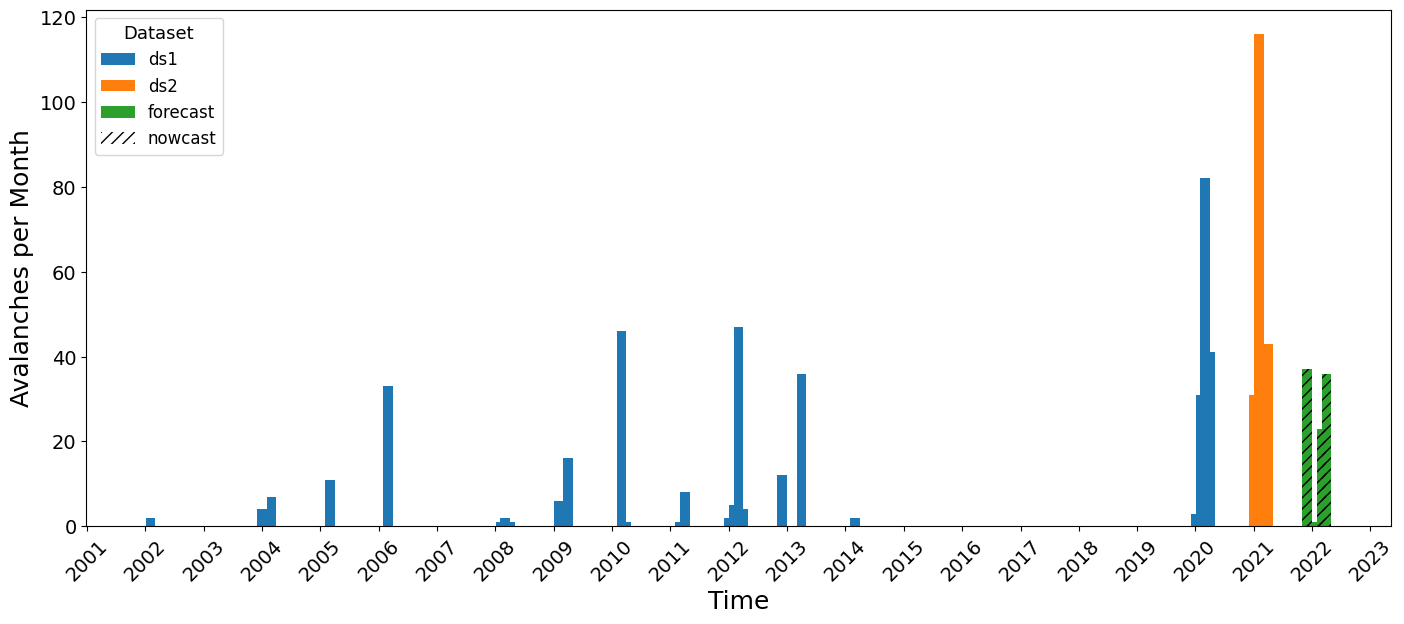

In [36]:
# Create the figure
plt.figure(figsize=(14, 6))

# Loop over each source and plot bars manually
for source in avalanches_per_month['source'].unique():
    df = avalanches_per_month[avalanches_per_month['source'] == source]
    
    if source == 'nowcast':
        # Plot hollow bars
        plt.bar(
            df['Year-Month'],
            df['Amount_Avalanches'],
            label=source,
            width=60,
            hatch='///',
            fill=False,       # no fill
            edgecolor= 'black',# bar edge color
            linewidth=0     # edge thickness
        )
    else:
        # Plot filled bars
        plt.bar(
            df['Year-Month'],
            df['Amount_Avalanches'],
            label=source,
            width=60
        )

# Formatting
plt.xlabel('Time', fontsize=18)
plt.ylabel('Avalanches per Month', fontsize=18)
plt.legend(title='Dataset', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set tick label sizes
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

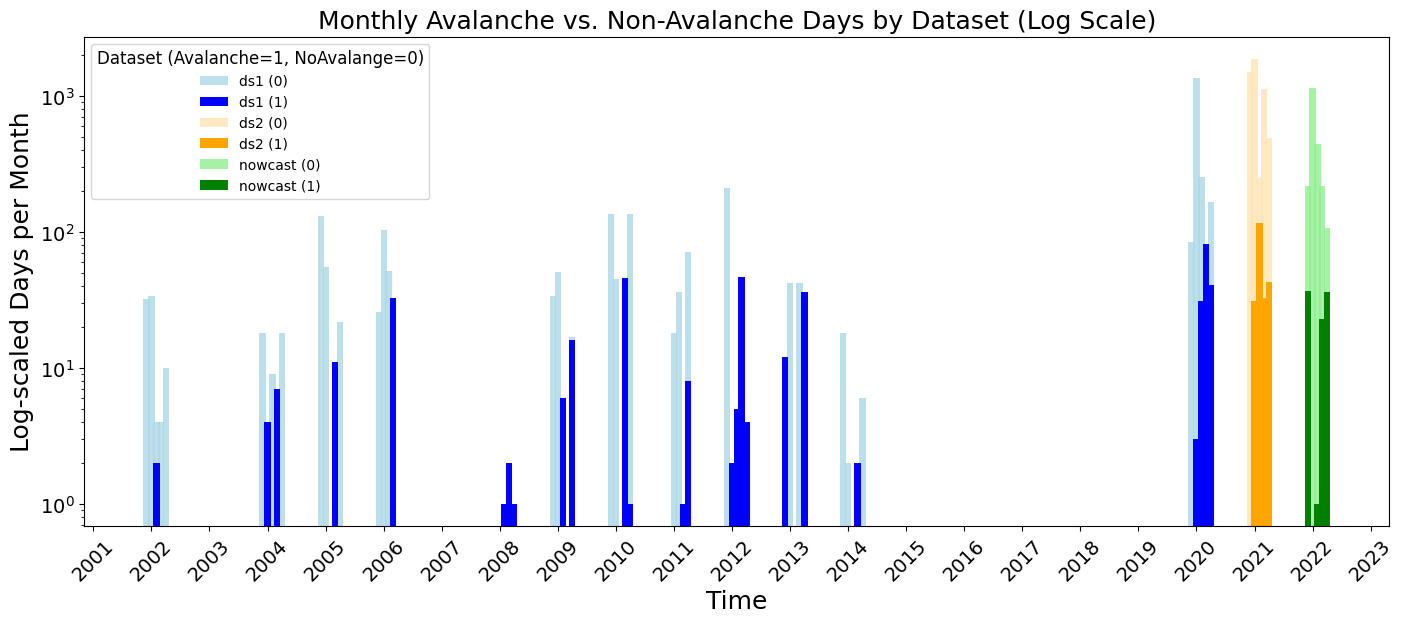

In [49]:
# Also include non-avalanche days
def prepare_plot_data(df, source_name):
    df = df[['datum', 'avalancheDay1']].copy() 
    df['datum'] = pd.to_datetime(df['datum'])
    df['source'] = source_name
    df['aval_status'] = df['avalancheDay1']  # 0 or 1
    df['Year-Month'] = df['datum'].dt.to_period('M').astype(str)
    return df

ds1_all = prepare_plot_data(ds1, 'ds1')
ds2_all = prepare_plot_data(ds2, 'ds2')
forecast_all = prepare_plot_data(forecast, 'nowcast')

combined_all = pd.concat([ds1_all, ds2_all, forecast_all], ignore_index=True)

# Group by Month, Source and Avalanche Status (0 or 1)
avalanches_monthly = combined_all.groupby(['Year-Month', 'source', 'aval_status']).size().reset_index(name='Count')

# Convert to datetime for plotting
avalanches_monthly['Year-Month'] = pd.to_datetime(avalanches_monthly['Year-Month'], format='%Y-%m')

# Split into 0s and 1s
aval0 = avalanches_monthly[avalanches_monthly['aval_status'] == 0]
aval1 = avalanches_monthly[avalanches_monthly['aval_status'] == 1]

# Plot
plt.figure(figsize=(14, 6))

# Define custom colors
color_map = {
    'ds1': ('blue', 'lightblue'),
    'ds2': ('orange', 'moccasin'),  # light orange
    'nowcast': ('green', 'lightgreen')
}

# Plot each dataset
for source in avalanches_monthly['source'].unique():
    df0 = aval0[aval0['source'] == source]
    df1 = aval1[aval1['source'] == source]
    col1, col0 = color_map.get(source, ('gray', 'lightgray'))  # fallback colors

    # non-avalanche days (0)
    plt.bar(df0['Year-Month'], df0['Count'], label=f'{source} (0)', width=40, color=col0, alpha=0.8)

    # avalanche days (1)
    plt.bar(df1['Year-Month'], df1['Count'], label=f'{source} (1)', width=40, color=col1)

# Log scale
plt.yscale('log')

# Formatting
plt.xlabel('Time', fontsize=18)
plt.ylabel('Log-scaled Days per Month', fontsize=18)
plt.title('Monthly Avalanche vs. Non-Avalanche Days by Dataset (Log Scale)', fontsize=18)
plt.legend(title='Dataset (Avalanche=1, NoAvalange=0)', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)

# Set tick label sizes
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Year-based x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()